In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as cores
import numpy as np

In [2]:
def ft_approx(x, t, w, dt):
    return dt * np.matmul(x, np.exp((np.outer(t, w)) * -1j))

In [3]:
def dft(x, n, k):
    return np.matmul(x, np.exp((2*np.pi/len(k)) * (np.outer(n, k)) * -1j))

$$
x_{a}(t) = e^{-1000\left | t \right |}
$$

Tranformada de Fourrier de $x_{a}(t)$:
$$ X_a(\Omega) = \frac{2 * 1000}{1000^2 - \Omega^2}$$

A transformada do sinal possui espectro par em amplitude e real devido a ser um sinal real e par.

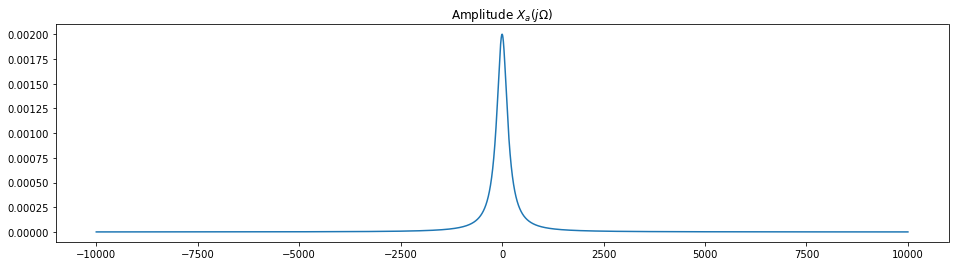

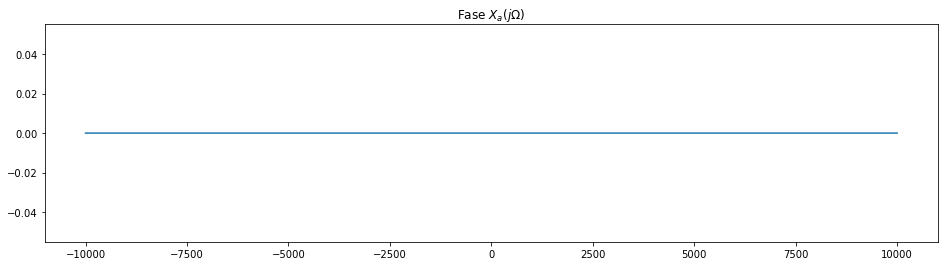

In [4]:
# Plot X(OMEGA)
OMEGA = np.linspace(-10000, 10000, 40001) * 2 * np.pi
X_OMEGA = (2 * 1000.)/(1000.**2 + OMEGA**2)

plt.figure(figsize=(16, 4))
plt.plot(OMEGA/(2 * np.pi), np.absolute(X_OMEGA))
plt.title('Amplitude $X_a(j\Omega)$')
plt.show()

plt.figure(figsize=(16, 4))         
plt.plot(OMEGA/(2 * np.pi), np.angle(X_OMEGA))
plt.title('Fase $X_a(j\Omega)$')
plt.show()

Definindo a frequência essencial, $\Omega_N$, como 1% da amplitude máxima do espectro obtem-se: 1583.6 Hz. A banda foi definida aproximando este valor de 1600 Hz.

In [5]:
np.sqrt((2000/(np.max(X_OMEGA)/100)) - (1000**2))/(2*np.pi)

1583.5716892985488

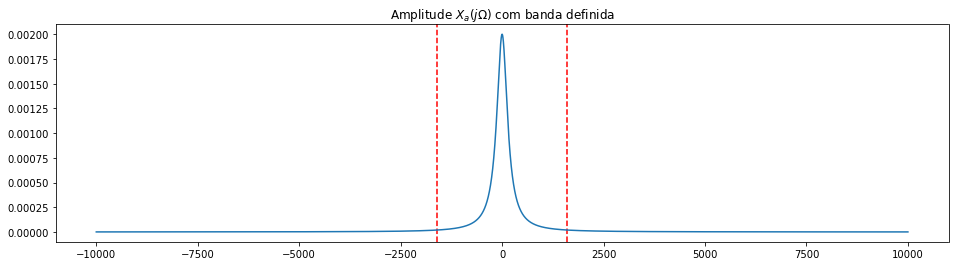

In [6]:
# Plot X(OMEGA)
OMEGA = np.linspace(-10000, 10000, 40001) * 2 * np.pi
X_OMEGA = (2 * 1000.)/(1000.**2 + OMEGA**2)
plt.figure(figsize=(16, 4))
plt.axvline(1600, ls='--', color='red')
plt.axvline(-1600, ls='--', color='red')

plt.plot(OMEGA/(2 * np.pi), X_OMEGA)
plt.title('Amplitude $X_a(j\Omega)$ com banda definida')
plt.show()

In [7]:
dt = .000001
t = np.append(np.arange(-.005, .005, dt), .005)

x_v = np.exp(-1000 * np.abs(t))

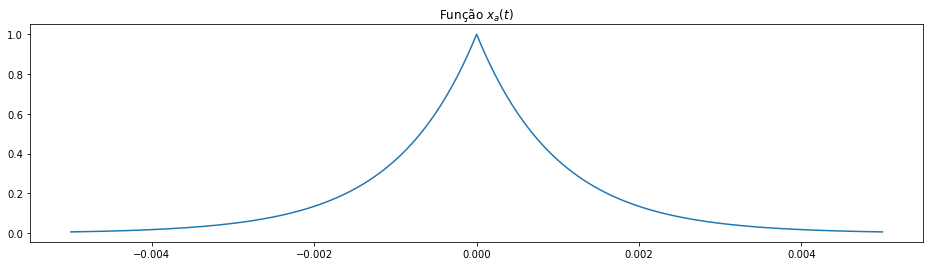

In [8]:
plt.figure(figsize=(16, 4))
plt.title('Função $x_a(t)$')
plt.plot(t, x_v)
plt.show()

In [9]:
w = np.append(np.arange(-10000, 10000, 1), 10000) * ( 2 * np.pi)

X_v_omega = ft_approx(x_v, t, w, dt)

Note que a fase de $X_v(j\Omega)$ possui amplitude muito baixa, na casa de $10^{-11}$, condizente com a fase da transformada analítica.

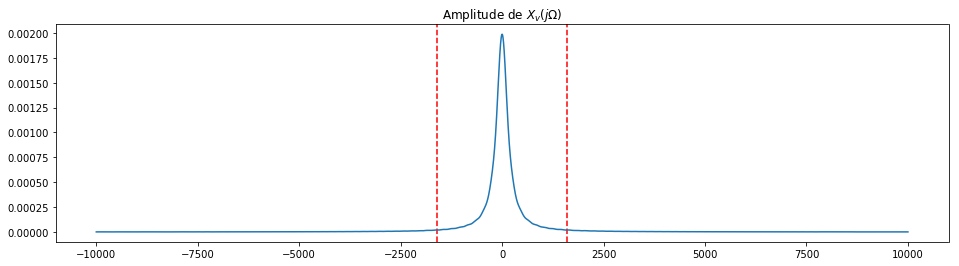

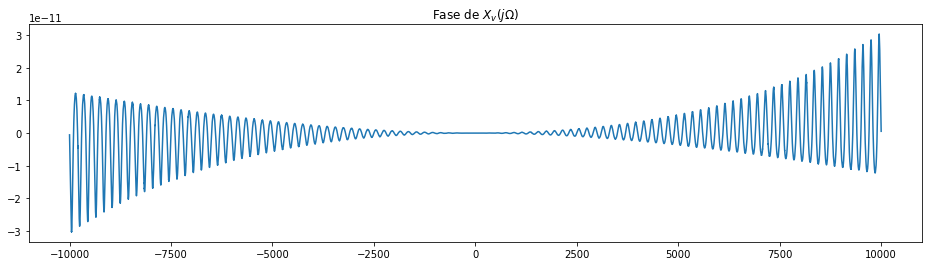

In [10]:
# Plot X_v_omega
plt.figure(figsize=(16, 4))
plt.axvline(1600, ls='--', color='red')
plt.axvline(-1600, ls='--', color='red')
plt.plot(w/(2 * np.pi), np.absolute(X_v_omega))
plt.title("Amplitude de $X_v(j\Omega)$")
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(w/(2 * np.pi), np.angle(X_v_omega))
plt.title("Fase de $X_v(j\Omega)$")
plt.show()

In [11]:
# Amostragem

# X1
F1 = 1000.
t_1 = np.append(np.arange(-.005, .005, 1./F1), .005)
# t_1 = np.linspace(-.005, .005, 11)
x1 = np.exp(-1000 * np.abs(t_1))
n = np.arange(-int(len(x1)/2), int(len(x1)/2) + 1)
# n = np.arange(0, len(x1))
k = 20 * np.arange(-512, 513)

In [12]:
X_1_omega = dft((1./F1)*x1, n, k)

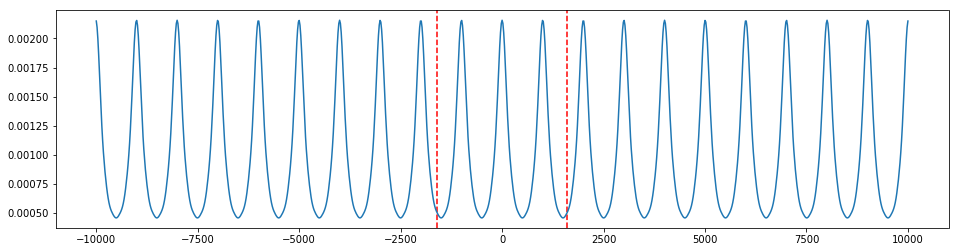

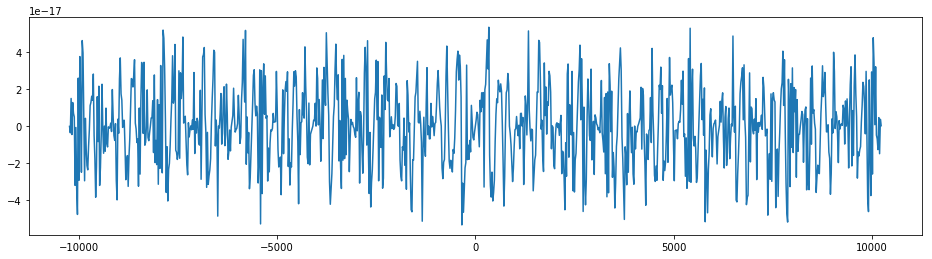

In [13]:
# Plot X_1_omega
plt.figure(figsize=(16, 4))
plt.axvline(1600, ls='--', color='red')
plt.axvline(-1600, ls='--', color='red')
    
plt.plot(1000*k/1024, np.absolute(X_1_omega))
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(k, np.angle(X_1_omega))
plt.show()

Podemos ver nos graficos de amplitude e fase acima que dentro da banda base existem três réplicas caracterizando um efeito de aliasing bem forte impossibilitando uma reconstrução confíavel do sinal. Este efeito decorre da frequência de amostragem para este caso não respeitar o teorema de Nyquist.

In [14]:
# X2
F2 = 5000.
t_2 = np.append(np.arange(-.005, .005, 1./F2), .005)
# t_2 = np.linspace(-.005, .005, 51)
x2 = np.exp(-1000 * np.abs(t_2))
n = np.arange(-int(len(x2)/2), int(len(x2)/2) + 1)
# n = np.arange(0, len(x2))
k = 4 * np.arange(-512, 513)

In [15]:
X_2_omega = dft((1./F2)*x2, n, k)

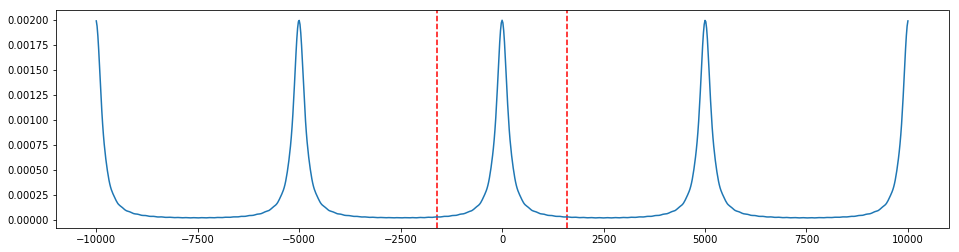

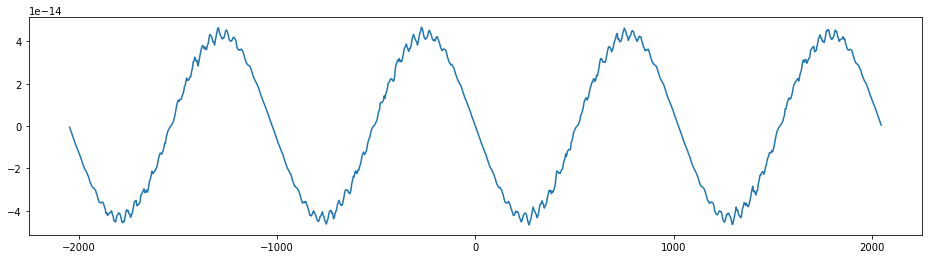

In [16]:
# Plot X_2_omega
plt.figure(figsize=(16, 4))
plt.axvline(1600, ls='--', color='red')
plt.axvline(-1600, ls='--', color='red')
    
plt.plot(5000*k/1024, np.absolute(X_2_omega))
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(k, np.angle(X_2_omega))
plt.show()

Neste caso, a banda possui apenas uma réplica dentro da banda base e matém seu formato original, garantindo uma recuperação confiável do sinal original. Este resultado era esperado já que a amostragem respeitava o teorema de Nyquist.

In [17]:
ta = np.append(np.arange(-.005, .005, .00005), .005)
x_rec = np.matmul(x2, np.sinc(F2*(np.outer(np.ones(len(n)), ta) - np.outer(n/F2, np.ones(len(ta))))))

x_a = np.exp(-1000 * np.abs(ta))

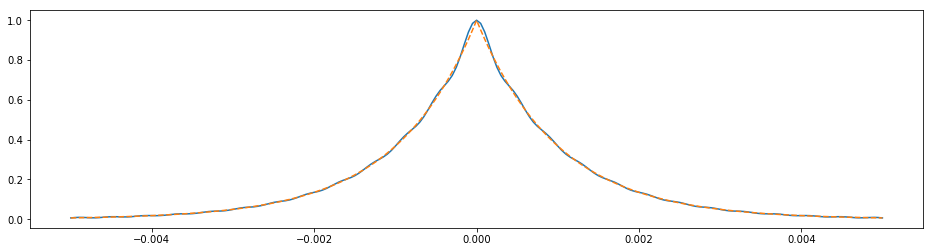

In [18]:
plt.figure(figsize=(16, 4))
plt.plot(ta, x_rec)
# plt.show()
# plt.figure(figsize=(16, 4))
plt.plot(ta, x_a, ls='--')
plt.show()

In [19]:
np.max(np.abs(x_rec - x_a))

0.036294043907365681

In [20]:
ta = np.append(np.arange(-.005, .005, .00005), .005)
x_rec = np.matmul(x1, np.sinc(F1*(np.outer(np.ones(11), ta) - np.outer(np.arange(-5, 6)/F1, np.ones(len(ta))))))

# x_a = np.exp(-1000 * np.abs(ta))

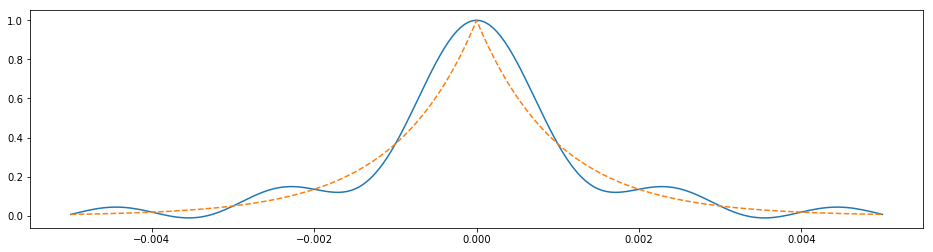

In [21]:
plt.figure(figsize=(16, 4))
plt.plot(ta, x_rec)
# plt.show()
# plt.figure(figsize=(16, 4))
plt.plot(ta, x_a, ls='--')
plt.show()

In [22]:
np.max(np.abs(x_rec - x_a))

0.18518602294672248